## EXL Assessment

### Importing the Dependencies


In [498]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from IPython import display

import warnings
warnings.filterwarnings("ignore")

### Obtaining the Data

In [376]:
data = pd.read_excel('D:/Downloads_D/EXL/Assignment_Data.xlsx')

In [377]:
data.head()

Tenure_Range       Date  Empl Id                                Location  \
0  10-15 years 2022-01-31       20  Jacksonville, FL - 301 West Bay Street   
1  15-20 Years 2022-01-31       23                  Charlotte, NC - 8600 D   
2  15-20 Years 2022-01-31       27         New York, NY - 730 Third Avenue   
3  10-15 years 2022-01-31       31                  Charlotte, NC - 8500 B   
4  20-25 Years 2022-01-31       32  Jacksonville, FL - 301 West Bay Street   

  Location Code              Work Country     Work City Work State  \
0       FL-301W  United States of America  Jacksonville         FL   
1       NC-860D  United States of America     Charlotte         NC   
2       NY-730T  United States of America      New York         NY   
3       NC-850B  United States of America     Charlotte         NC   
4       FL-301W  United States of America  Jacksonville         FL   

                       Job Title                       Business Title  ...  \
0          Accounting Management                   Accounting Manager  ...   
1     Institutional Case Manager                   Inst. Case Manager  ...   
2    Head, Fixed Income Quant PM          Head, Fixed Income Quant PM  ...   
3       Sr Investment Accountant             Sr Investment Accountant  ...   
4  Bus Support Relationship Spec  Business Banking Support Specialist  ...   

  Service Date Tenure Time in Role                      Marital Status  \
0   2010-07-06  11.57         0.69  Married (United States of America)   
1   2005-07-28  16.51         0.77   Single (United States of America)   
2   2004-06-07  17.65         0.69  Married (United States of America)   
3   2011-02-02  11.00         1.08  Married (United States of America)   
4   2001-04-23  20.77         0.54  Married (United States of America)   

     Generation  Reporting Level  \
0  Generation X                6   
1  Generation X                6   
2  Generation X                6   
3  Generation Y                7   
4  Generation X                9   

   Assignment Category (or Full Time/Part Time)   Age Current rating  Term  
0                                     Full time  52.0            4.0    No  
1                                     Full time  43.0            3.0    No  
2                                     Full time  52.0            3.0    No  
3                                     Full time  40.0            4.0    No  
4                                     Full time  45.0            3.0    No  

[5 rows x 24 columns]

### Scrubbing the Data

In [378]:
data.isnull().sum()

Tenure_Range                                        0
Date                                                0
Empl Id                                             0
Location                                            0
Location Code                                       0
Work Country                                        0
Work City                                        2365
Work State                                       8268
Job Title                                           0
Business Title                                      0
Individual Contributor / People Leader            117
Job Family                                        133
Client Facing                                     731
Current Hire Date                                   0
Service Date                                     7233
Tenure                                              0
Time in Role                                        0
Marital Status                                   7775
Generation                  

In [379]:
data.isnull().any().sum()

10

### Statistical Overview


In [380]:
data.shape

(46972, 24)

In [381]:
data.dtypes

Tenure_Range                                            object
Date                                            datetime64[ns]
Empl Id                                                  int64
Location                                                object
Location Code                                           object
Work Country                                            object
Work City                                               object
Work State                                              object
Job Title                                               object
Business Title                                          object
Individual Contributor / People Leader                  object
Job Family                                              object
Client Facing                                           object
Current Hire Date                               datetime64[ns]
Service Date                                    datetime64[ns]
Tenure                                                 

In [382]:
#data.dropna()

In [383]:
# Display the statistical overview of the employees
data.describe()

Empl Id        Tenure  Time in Role  Reporting Level  \
count  46972.000000  46972.000000  46972.000000     46972.000000   
mean    9549.244656      6.891869      1.758361         6.611513   
std     5744.672131      7.078201      2.320126         1.151718   
min        1.000000      0.000000      0.000000         1.000000   
25%     4659.000000      1.660000      0.460000         6.000000   
50%     9341.000000      4.770000      0.950000         7.000000   
75%    14028.000000      9.470000      1.630000         7.000000   
max    21825.000000     48.050000     22.180000        10.000000   

                Age  Current rating  
count  39758.000000    34715.000000  
mean      41.835354        3.354026  
std       11.338726        0.575894  
min       19.000000        1.000000  
25%       32.000000        3.000000  
50%       41.000000        3.000000  
75%       51.000000        4.000000  
max       76.000000        5.000000

### Exploratory Data Analysis

In [386]:
correl = data.corr()

<AxesSubplot:>

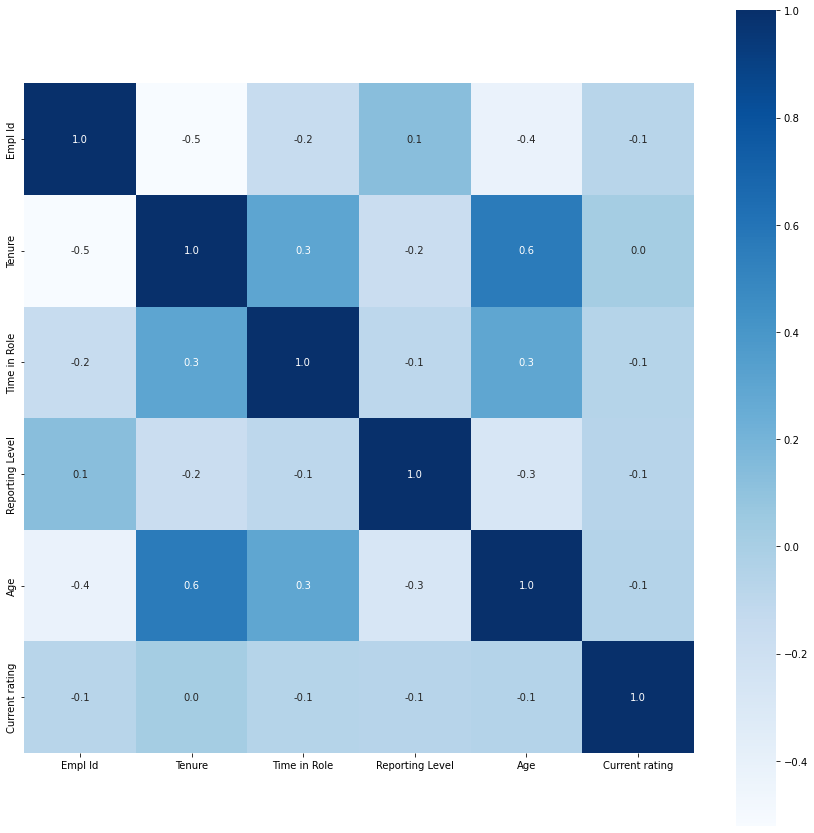

In [387]:
plt.figure(figsize= (15, 15))
sns.heatmap(correl, cbar = True, square= True, fmt = '.1f', annot= True, annot_kws= {'size' : 10 }, cmap = 'Blues' )

In [470]:
df = data.copy()

In [471]:
df

Tenure_Range       Date  Empl Id  \
0      10-15 years 2022-01-31       20   
1      15-20 Years 2022-01-31       23   
2      15-20 Years 2022-01-31       27   
3      10-15 years 2022-01-31       31   
4      20-25 Years 2022-01-31       32   
...            ...        ...      ...   
46967    0-5 years 2021-12-30    21799   
46968    0-5 years 2021-12-30    21814   
46969    0-5 years 2021-12-30    21821   
46970    0-5 years 2021-12-30    21824   
46971    0-5 years 2021-12-30    21825   

                                     Location Location Code  \
0      Jacksonville, FL - 301 West Bay Street       FL-301W   
1                      Charlotte, NC - 8600 D       NC-860D   
2             New York, NY - 730 Third Avenue       NY-730T   
3                      Charlotte, NC - 8500 B       NC-850B   
4      Jacksonville, FL - 301 West Bay Street       FL-301W   
...                                       ...           ...   
46967                        Mumbai - Virtual       MU-VRTL   
46968       Charlotte Main 8500 Carnegie Blvd       NC-850B   
46969                        Mumbai - Virtual       MU-VRTL   
46970       Charlotte Main 8500 Carnegie Blvd       NC-850B   
46971     Mumbai, India - Winchester Building       MU-WIN2   

                   Work Country     Work City Work State  \
0      United States of America  Jacksonville         FL   
1      United States of America     Charlotte         NC   
2      United States of America      New York         NY   
3      United States of America     Charlotte         NC   
4      United States of America  Jacksonville         FL   
...                         ...           ...        ...   
46967                     India           NaN         MH   
46968  United States of America     Charlotte         NC   
46969                     India           NaN         MH   
46970  United States of America     Charlotte         NC   
46971                     India        Mumbai         MH   

                              Job Title                       Business Title  \
0                 Accounting Management                   Accounting Manager   
1            Institutional Case Manager                   Inst. Case Manager   
2           Head, Fixed Income Quant PM          Head, Fixed Income Quant PM   
3              Sr Investment Accountant             Sr Investment Accountant   
4         Bus Support Relationship Spec  Business Banking Support Specialist   
...                                 ...                                  ...   
46967  CW-Variable Rate-IT Conslt/Deliv     CW-Variable Rate-IT Conslt/Deliv   
46968          CW-ITDS Architect - Lead             CW-ITDS Architect - Lead   
46969        CW-ITDS Architect - Senior           CW-ITDS Architect - Senior   
46970          CW-ITDS Architect - Lead             CW-ITDS Architect - Lead   
46971                        CW-GBS-T&M                           CW-GBS-T&M   

       ... Service Date Tenure Time in Role  \
0      ...   2010-07-06  11.57         0.69   
1      ...   2005-07-28  16.51         0.77   
2      ...   2004-06-07  17.65         0.69   
3      ...   2011-02-02  11.00         1.08   
4      ...   2001-04-23  20.77         0.54   
...    ...          ...    ...          ...   
46967  ...          NaT   0.02         0.02   
46968  ...          NaT   0.01         0.01   
46969  ...          NaT   0.00         0.00   
46970  ...          NaT   0.01         0.01   
46971  ...          NaT   0.01         0.01   

                           Marital Status       Generation  Reporting Level  \
0      Married (United States of America)     Generation X                6   
1       Single (United States of America)     Generation X                6   
2      Married (United States of America)     Generation X                6   
3      Married (United States of America)     Generation Y                7   
4      Married (United States of America)     Generation X                9   
...                    

In [390]:
# Checking for every Unique values in every feature.

for var in df.columns:
    print(var, df[var].unique())

Tenure_Range ['10-15 years' '15-20 Years' '20-25 Years' '5-10 Years' 'Above 25 Years'
 '0-5 years']
Date ['2022-01-31T00:00:00.000000000' '2022-02-28T00:00:00.000000000'
 '2022-03-31T00:00:00.000000000' '2022-04-30T00:00:00.000000000'
 '2022-05-31T00:00:00.000000000' '2022-06-30T00:00:00.000000000'
 '2021-06-30T00:00:00.000000000' '2021-07-31T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-09-30T00:00:00.000000000'
 '2021-10-30T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-12-30T00:00:00.000000000']
Empl Id [   20    23    27 ... 21821 21824 21825]
Location ['Jacksonville, FL - 301 West Bay Street' 'Charlotte, NC - 8600 D'
 'New York, NY - 730 Third Avenue' 'Charlotte, NC - 8500 B'
 'Dallas, TX - 2900 Lake Vista Drive' 'St. Louis, MO - 8300 Eager Road'
 'Parsippany, NJ - 10 Waterview Blvd' 'Denver, CO - 1670 Broadway'
 'Ohio - Virtual' 'Charlotte, NC - Betsill' 'Islandia, NY - 11 Oval Drive'
 'Ft. Lauderdale, FL - 2521 East Commercial Blvd'
 'Broomfield, CO - 11

### Handling Null values

In [472]:
cols = ['Work City', 'Work State', 'Service Date', 'Marital Status', 'Client Facing',
        'Individual Contributor / People Leader' ,'Job Family', 'Generation']
for i in cols:
    df[i] = df[i].fillna('0')

{'whiskers': [<matplotlib.lines.Line2D at 0x266ff8372e0>,
 'caps': [<matplotlib.lines.Line2D at 0x266ff837a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x266ff833f10>],
 'medians': [<matplotlib.lines.Line2D at 0x266ff83d160>],
 'fliers': [<matplotlib.lines.Line2D at 0x266ff83d4f0>],
 'means': []}

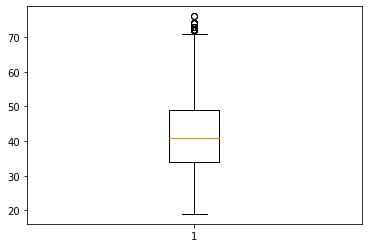

In [463]:
# Before Imputing the null values with mean values, we have to check for the outliers 
plt.boxplot(df['Age'])

In [464]:
df[df['Age'] > 70]

Tenure_Range       Date  Empl Id  Location  Location Code  \
349               1 2022-01-31     1631        50            167   
510               1 2022-01-31     2515        69            249   
561               1 2022-01-31     2802        69            249   
799               4 2022-01-31     3973        43            159   
1119              4 2022-01-31     5507        76             38   
3082              1 2022-02-28      482       116            201   
3571              1 2022-02-28     2802        69            249   
3816              4 2022-02-28     4088       122             58   
4110              4 2022-02-28     5507        76             38   
6524              1 2022-03-31     2515        69            249   
6590              1 2022-03-31     2801        69            249   
6743              4 2022-03-31     3561        48            163   
7223              4 2022-03-31     5970       248            240   
7263              5 2022-03-31     6176       184            196   
8135              4 2022-03-31    10483       260             13   
8503              3 2022-03-31    12395        28             39   
9041              0 2022-03-31    15120       213            219   
13965             2 2022-05-31      482       116            201   
14435             1 2022-05-31     2801        69            249   
14498             1 2022-05-31     3133       251            149   
16188             3 2022-05-31    12395        28             39   
18840             4 2022-06-30     5594       180            208   
19780             4 2022-06-30    10483       260             13   
21933             1 2021-07-31     1631        50            167   
22094             1 2021-07-31     2515        69            249   
22145             1 2021-07-31     2802        69            249   
22383             4 2021-07-31     3973        43            159   
22703             4 2021-07-31     5507        76             38   
24666             1 2021-08-28      482       116            201   
25155             1 2021-08-28     2802        69            249   
25400             4 2021-08-28     4088       122             58   
25694             4 2021-08-28     5507        76             38   
28108             1 2021-09-30     2515        69            249   
28174             1 2021-09-30     2801        69            249   
28327             4 2021-09-30     3561        48            163   
28807             4 2021-09-30     5970       248            240   
28847             5 2021-09-30     6176       184            196   
29719             4 2021-09-30    10483       260             13   
30087             3 2021-09-30    12395        28             39   
30625             0 2021-09-30    15120       213            219   
35549             2 2021-11-30      482       116            201   
36019             1 2021-11-30     2801        69            249   
36082             1 2021-11-30     3133       251            149   
37772             3 2021-11-30    12395        28             39   
40424             4 2021-06-30     5594       180            208   
41364             4 2021-06-30    10483       260             13   
44228             4 2021-12-30     5594       180            208   
45168             4 2021-12-30    10483       260             13   

       Work Country  Work City  Work State  Job Title  Business Title  ...  \
349              27         29          32       2119            3233  ...   
510              27         78          53       2517            1777  ...   
561              27         78          53        911            1347  ...   
799              27         29          32       1171            1796  ...   
1119             27         44           9        196             276  ...   
3082             27         69          40        308             423  ...   
3571             27         78          53        911            1347  ...   
3816             27         71          13       1

##### Here we can see that only 48 data values have Age > 70 which has outliers, so we can perform Mean imputation to the 'Age' variable

In [473]:
# Performing Mean Imputation to 'Age' variable
df['Age'].mean()

df['Age'].fillna((df['Age'].mean()), inplace=True)
df['Age'] = df['Age'].astype("int")

In [474]:
# Performing Interpolation to 'Current rating' variable (ffill/bfill)
df['Current rating']= df['Current rating'].fillna(method='ffill') # done the imputation for 'Current rating' by forward fill Interpolation method

In [475]:
df['Current rating'].isnull().sum()

0

In [476]:
df.isnull().sum()

Tenure_Range                                    0
Date                                            0
Empl Id                                         0
Location                                        0
Location Code                                   0
Work Country                                    0
Work City                                       0
Work State                                      0
Job Title                                       0
Business Title                                  0
Individual Contributor / People Leader          0
Job Family                                      0
Client Facing                                   0
Current Hire Date                               0
Service Date                                    0
Tenure                                          0
Time in Role                                    0
Marital Status                                  0
Generation                                      0
Reporting Level                                 0


In [477]:
df.isnull().any().sum()

0

### Feature Engineering

In [478]:
l1 = []
for i in df['Marital Status'].unique():
    l1.append(i)
l1
#len(l)

['Married (United States of America)',
 'Single (United States of America)',
 'Divorced (United States of America)',
 'Domestic partnership (United States of America)',
 'Common-Law (United States of America)',
 'Widowed (United States of America)',
 'Legally Separated (United States of America)',
 'Single (United Kingdom)',
 'Single (India)',
 'Married (India)',
 'Single (Singapore)',
 0,
 'Married/Civil Partnership (United Kingdom)',
 'Married (Austria)',
 'Married (Singapore)',
 'Married (Germany)',
 'Divorced (France)',
 'Single (Spain)',
 'Single (Luxembourg)',
 'Pacsed (France)',
 'Married (Japan)',
 'Divorced (Germany)',
 'Single (Germany)',
 'Single (Hong Kong)',
 'Married (Australia)',
 'Single (France)',
 'Married (Luxembourg)',
 'Single (Japan)',
 'Divorced (United Kingdom)',
 'Single (Poland)',
 'Single (Uruguay)',
 'Married (Poland)',
 'Married (Colombia)',
 'Married (Hong Kong)',
 'Unmarried (Denmark)',
 'Single (Romania)',
 'Single (Italy)',
 'Cohabiting (United Kingdom)

In [479]:
l2 = ['Married',
 'Single',
 'Divorced',
 'Domestic partnership',
 'Common-Law',
 'Widowed',
 'Legally Separated',
 'Single',
 'Single',
 'Married',
 'Single',
 '0',
 'Married/Civil Partnership',
 'Married',
 'Married',
 'Married',
 'Divorced',
 'Single',
 'Single',
 'Pacsed',
 'Married',
 'Divorced',
 'Single',
 'Single',
 'Married',
 'Single',
 'Married',
 'Single',
 'Divorced',
 'Single',
 'Single',
 'Married',
 'Married',
 'Married',
 'Unmarried',
 'Single',
 'Single',
 'Cohabiting',
 'Divorced',
 'Not Married, Single, Never Married',
 'Married/Civil Partnership',
 'Single',
 '0',
 'Single',
 'Common Law',
 'Married',
 'Widowed',
 'Widowed',
 'Single',
 'Single',
 'Separated',
 'Married',
 'Civil Partnership',
 'Separated',
 'Divorced',
 'Married',
 'Cohabit',
 'Separated']
l2
len(l2)

58

In [480]:
l3 = []
for i in df['Tenure_Range'].unique():
    l3.append(i)
print(l3)
#len(l)

['10-15 years', '15-20 Years', '20-25 Years', '5-10 Years', 'Above 25 Years', '0-5 years']


In [481]:
l4 = ['10-15', '15-20', '20-25', '5-10', 'Above 25', '0-5']

##### Replacing the unwanted texts from ' Tenure_Range '  and '  Marital Status ' features

In [482]:
df.replace({'Tenure_Range': l3, 'Marital Status': l1}, 
    {'Tenure_Range': l4, 'Marital Status': l2}, inplace = True)

In [483]:
df['Marital Status']

0        Married
1         Single
2        Married
3        Married
4        Married
          ...   
46967          0
46968          0
46969          0
46970          0
46971          0
Name: Marital Status, Length: 46972, dtype: object

In [484]:
df['Tenure_Range']

0        10-15
1        15-20
2        15-20
3        10-15
4        20-25
         ...  
46967      0-5
46968      0-5
46969      0-5
46970      0-5
46971      0-5
Name: Tenure_Range, Length: 46972, dtype: object

In [485]:
# Now checking for the Unique values in ' Tenure_Range ' and ' Marital Status ' features
cols = ['Tenure_Range', 'Marital Status']

for var in df[cols]:
    #print(var, df[var].unique())
    print(df[var].value_counts(), '\n')

0-5         24243
5-10        11863
10-15        4887
15-20        3046
20-25        1478
Above 25     1455
Name: Tenure_Range, dtype: int64 

Married                               23086
Single                                13241
0                                      7881
Divorced                               1872
Married/Civil Partnership               383
Widowed                                 179
Domestic partnership                    175
Cohabiting                               40
Common-Law                               25
Not Married, Single, Never Married       21
Separated                                20
Legally Separated                        18
Unmarried                                13
Civil Partnership                         7
Pacsed                                    4
Common Law                                4
Cohabit                                   3
Name: Marital Status, dtype: int64 



##### This shows that previousky we have more unique values in  ' Marital Status' and, now we have less unique valuesas compared to previous one.

In [486]:
# Now again checking the dataframe
df

Tenure_Range       Date  Empl Id  \
0            10-15 2022-01-31       20   
1            15-20 2022-01-31       23   
2            15-20 2022-01-31       27   
3            10-15 2022-01-31       31   
4            20-25 2022-01-31       32   
...            ...        ...      ...   
46967          0-5 2021-12-30    21799   
46968          0-5 2021-12-30    21814   
46969          0-5 2021-12-30    21821   
46970          0-5 2021-12-30    21824   
46971          0-5 2021-12-30    21825   

                                     Location Location Code  \
0      Jacksonville, FL - 301 West Bay Street       FL-301W   
1                      Charlotte, NC - 8600 D       NC-860D   
2             New York, NY - 730 Third Avenue       NY-730T   
3                      Charlotte, NC - 8500 B       NC-850B   
4      Jacksonville, FL - 301 West Bay Street       FL-301W   
...                                       ...           ...   
46967                        Mumbai - Virtual       MU-VRTL   
46968       Charlotte Main 8500 Carnegie Blvd       NC-850B   
46969                        Mumbai - Virtual       MU-VRTL   
46970       Charlotte Main 8500 Carnegie Blvd       NC-850B   
46971     Mumbai, India - Winchester Building       MU-WIN2   

                   Work Country     Work City Work State  \
0      United States of America  Jacksonville         FL   
1      United States of America     Charlotte         NC   
2      United States of America      New York         NY   
3      United States of America     Charlotte         NC   
4      United States of America  Jacksonville         FL   
...                         ...           ...        ...   
46967                     India             0         MH   
46968  United States of America     Charlotte         NC   
46969                     India             0         MH   
46970  United States of America     Charlotte         NC   
46971                     India        Mumbai         MH   

                              Job Title                       Business Title  \
0                 Accounting Management                   Accounting Manager   
1            Institutional Case Manager                   Inst. Case Manager   
2           Head, Fixed Income Quant PM          Head, Fixed Income Quant PM   
3              Sr Investment Accountant             Sr Investment Accountant   
4         Bus Support Relationship Spec  Business Banking Support Specialist   
...                                 ...                                  ...   
46967  CW-Variable Rate-IT Conslt/Deliv     CW-Variable Rate-IT Conslt/Deliv   
46968          CW-ITDS Architect - Lead             CW-ITDS Architect - Lead   
46969        CW-ITDS Architect - Senior           CW-ITDS Architect - Senior   
46970          CW-ITDS Architect - Lead             CW-ITDS Architect - Lead   
46971                        CW-GBS-T&M                           CW-GBS-T&M   

       ...         Service Date Tenure Time in Role Marital Status  \
0      ...  2010-07-06 00:00:00  11.57         0.69        Married   
1      ...  2005-07-28 00:00:00  16.51         0.77         Single   
2      ...  2004-06-07 00:00:00  17.65         0.69        Married   
3      ...  2011-02-02 00:00:00  11.00         1.08        Married   
4      ...  2001-04-23 00:00:00  20.77         0.54        Married   
...    ...                  ...    ...          ...            ...   
46967  ...                    0   0.02         0.02              0   
46968  ...                    0   0.01         0.01              0   
46969  ...                    0   0.00         0.00              0   
46970  ...                    0   0.01         0.01              0   
46971  ...                    0   0.01         0.01              0   

            Generation  Reporting Level  \
0         Generation X                6   
1         Generation X                6   
2         Generation X                6   
3         Generation Y                7   
4     

In [487]:
df1 = df.copy()

### Label Encoding

In [409]:
# Converting Categorical data into Numerical data

In [410]:
encoder = LabelEncoder()

In [411]:
df[df['Generation'] == '0']

Tenure_Range       Date  Empl Id                         Location  \
17227          0-5 2022-05-31    17290  Boston, MA - 70 Franklin Street   
17682          0-5 2022-05-31    20013   New York, NY - 100 Park Avenue   
38811          0-5 2021-11-30    17290  Boston, MA - 70 Franklin Street   
39266          0-5 2021-11-30    20013   New York, NY - 100 Park Avenue   

      Location Code              Work Country Work City Work State  \
17227       MA-BSTN  United States of America    Boston         MA   
17682       NY-100P  United States of America  New York         NY   
38811       MA-BSTN  United States of America    Boston         MA   
39266       NY-100P  United States of America  New York         NY   

                              Job Title                    Business Title  \
17227  CW-Lead Business Systems Analyst  CW-Lead Business Systems Analyst   
17682  CW-Variable Rate-Mgmt Consulting  CW-Variable Rate-Mgmt Consulting   
38811  CW-Lead Business Systems Analyst  CW-Lead Business Systems Analyst   
39266  CW-Variable Rate-Mgmt Consulting  CW-Variable Rate-Mgmt Consulting   

       ... Service Date Tenure Time in Role Marital Status Generation  \
17227  ...            0   2.65         2.65              0          0   
17682  ...            0   0.16         0.16              0          0   
38811  ...            0   2.65         2.65              0          0   
39266  ...            0   0.16         0.16              0          0   

       Reporting Level  Assignment Category (or Full Time/Part Time) Age  \
17227                6                                     Full time  46   
17682                5                                     Full time  41   
38811                6                                     Full time  46   
39266                5                                     Full time  41   

      Current rating  Term  
17227            3.0   Yes  
17682            3.0    No  
38811            3.0   Yes  
39266            3.0    No  

[4 rows x 24 columns]

In [412]:
encode_cols = ['Tenure_Range', 'Location', 'Location Code',
       'Work Country', 'Work City', 'Work State', 'Job Title',
       'Business Title', 'Individual Contributor / People Leader',
       'Job Family', 'Client Facing', 'Marital Status', 'Generation',
       'Assignment Category (or Full Time/Part Time)',
       'Term']

In [413]:
for i in encode_cols:
    df[i] = encoder.fit_transform(df[i])

In [414]:
df['Marital Status']

0         9
1        14
2         9
3         9
4         9
         ..
46967     0
46968     0
46969     0
46970     0
46971     0
Name: Marital Status, Length: 46972, dtype: int32

In [415]:
cols = ['Marital Status']

for var in df[cols]:
    #print(var, df[var].unique())
    print(df[var].value_counts(), '\n')

9     23086
14    13241
0      7881
6      1872
10      383
16      179
7       175
3        40
5        25
11       21
13       20
8        18
15       13
1         7
12        4
4         4
2         3
Name: Marital Status, dtype: int64 



In [416]:
df

Tenure_Range       Date  Empl Id  Location  Location Code  \
0                 1 2022-01-31       20       122             58   
1                 2 2022-01-31       23        46            161   
2                 2 2022-01-31       27       184            196   
3                 1 2022-01-31       31        43            159   
4                 3 2022-01-31       32       122             58   
...             ...        ...      ...       ...            ...   
46967             0 2021-12-30    21799       167            155   
46968             0 2021-12-30    21814        40            159   
46969             0 2021-12-30    21821       167            155   
46970             0 2021-12-30    21824        40            159   
46971             0 2021-12-30    21825       168            156   

       Work Country  Work City  Work State  Job Title  Business Title  ...  \
0                27         71          13         27              47  ...   
1                27         29          32       1192            1827  ...   
2                27        103          40       1075            1664  ...   
3                27         29          32       2177            3304  ...   
4                27         71          13        274             431  ...   
...             ...        ...         ...        ...             ...  ...   
46967            13          0          26        497             676  ...   
46968            27         29          32        428             607  ...   
46969            13          0          26        429             608  ...   
46970            27         29          32        428             607  ...   
46971            13         97          26        415             594  ...   

              Service Date  Tenure  Time in Role Marital Status Generation  \
0      2010-07-06 00:00:00   11.57          0.69              9          3   
1      2005-07-28 00:00:00   16.51          0.77             14          3   
2      2004-06-07 00:00:00   17.65          0.69              9          3   
3      2011-02-02 00:00:00   11.00          1.08              9          4   
4      2001-04-23 00:00:00   20.77          0.54              9          3   
...                    ...     ...           ...            ...        ...   
46967                    0    0.02          0.02              0          2   
46968                    0    0.01          0.01              0          2   
46969                    0    0.00          0.00              0          2   
46970                    0    0.01          0.01              0          2   
46971                    0    0.01          0.01              0          2   

       Reporting Level  Assignment Category (or Full Time/Part Time)  Age  \
0                    6                                             0   52   
1                    6                                             0   43   
2                    6                                             0   52   
3                    7                                             0   40   
4                    9                                             0   45   
...                ...                                           ...  ...   
46967                6                                             0   41   
46968                8                                             0   41   
46969                7                                             0   41   
46970                7                                             0   41   
46971                7                                             0   41   

       Current rating  Term  
0                 4.0     0  
1                 3.0     0  
2                 3.0     0  
3                 4.0     0  
4                 3.0     0  
...               ...   ...  
46967             3.0     1  
46968             3.0     0  
46969             3.0     1  
46970             3.0     0  
46971             3.0     1  

[46972 rows x 24 columns]

### In ' Assignment Category (or Full Time/Part Time) ' feature :
##### 0   - > has not left the organization
##### 1   - > has left the organization

### In Target variable  ' Term ' feature :
##### 0   - > Full time
##### 1   - >Part time

In [417]:
correl = df.corr()

<AxesSubplot:>

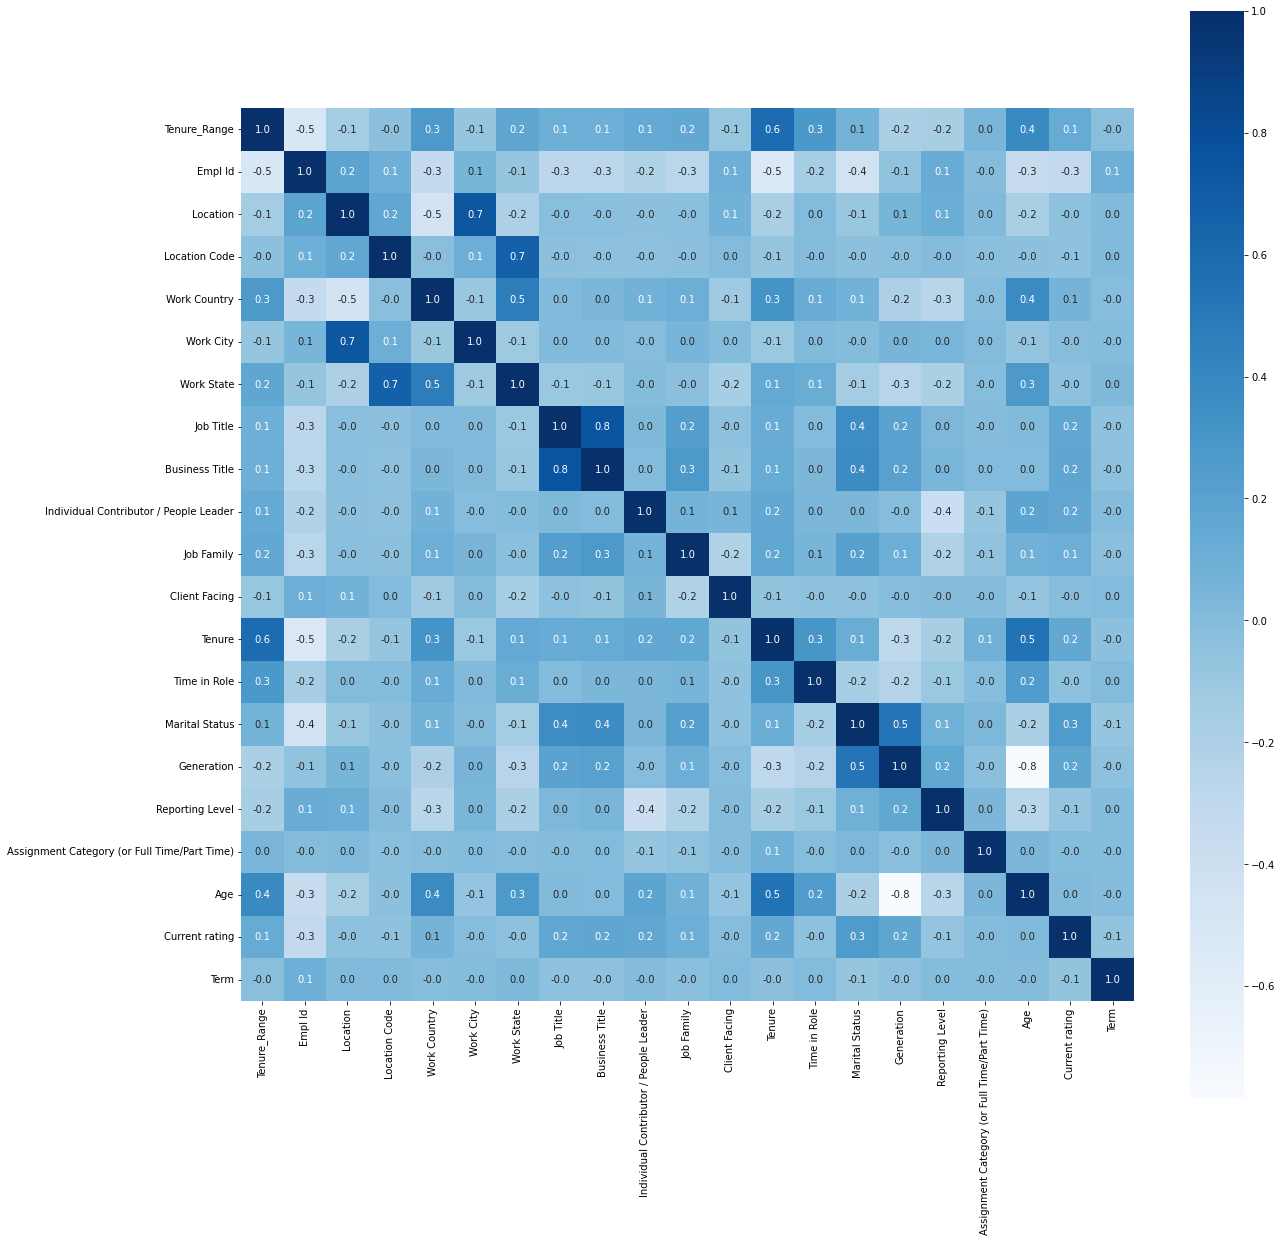

In [418]:
plt.figure(figsize= (20, 20))
sns.heatmap(correl, cbar = True, square= True, fmt = '.1f', annot= True, annot_kws= {'size' : 10 }, cmap = 'Blues' )

In [419]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other features
def correlate(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j ] > threshold):        # We are interested in absolute coefficient value also
                colname = corr_matrix.columns[i]                # getting the name of the column
                col_corr.add(colname)
    return col_corr
            

In [420]:
corr_features = correlate(df, 0.5)
len(set(corr_features))

6

In [421]:
corr_features

{'Age', 'Business Title', 'Generation', 'Tenure', 'Work City', 'Work State'}

#### 2. By our correlation heat map we can find that we have multicollinearity in some features.

##### Summary:

#### From the heatmap, there is a positive(+) correlation :

##### between 'Age', 'Business Title', 'Generation', 'Tenure', 'Work City', 'Work State'. Which could mean that the employees are in same location can be more highly correlated to each other.

##### For the negative(-) 'Age' and 'Generation' highly correlated. I'm assuming that  if Age is growing more then the new generation with young people will be added more.

In [422]:
# Now from the given correlation heatmap we can drop some of the features which are correlated with each other 
drop_cols =  ['Date', 'Location', 'Location Code', 'Business Title', 'Current Hire Date', 'Service Date']
df.drop(columns = drop_cols, axis = 1)

Tenure_Range  Empl Id  Work Country  Work City  Work State  Job Title  \
0                 1       20            27         71          13         27   
1                 2       23            27         29          32       1192   
2                 2       27            27        103          40       1075   
3                 1       31            27         29          32       2177   
4                 3       32            27         71          13        274   
...             ...      ...           ...        ...         ...        ...   
46967             0    21799            13          0          26        497   
46968             0    21814            27         29          32        428   
46969             0    21821            13          0          26        429   
46970             0    21824            27         29          32        428   
46971             0    21825            13         97          26        415   

       Individual Contributor / People Leader  Job Family  Client Facing  \
0                                           2          79              2   
1                                           1         206              1   
2                                           2         186              2   
3                                           1          85              2   
4                                           1          33              2   
...                                       ...         ...            ...   
46967                                       1          53              2   
46968                                       1          53              2   
46969                                       1          53              2   
46970                                       1          53              2   
46971                                       1          53              2   

       Tenure  Time in Role  Marital Status  Generation  Reporting Level  \
0       11.57          0.69               9           3                6   
1       16.51          0.77              14           3                6   
2       17.65          0.69               9           3                6   
3       11.00          1.08               9           4                7   
4       20.77          0.54               9           3                9   
...       ...           ...             ...         ...              ...   
46967    0.02          0.02               0           2                6   
46968    0.01          0.01               0           2                8   
46969    0.00          0.00               0           2                7   
46970    0.01          0.01               0           2                7   
46971    0.01          0.01               0           2                7   

       Assignment Category (or Full Time/Part Time)  Age  Current rating  Term  
0                                                 0   52             4.0     0  
1                                                 0   43             3.0     0  
2                                                 0   52             3.0     0  
3                                                 0   40             4.0     0  
4                                                 0   45             3.0     0  
...                                             ...  ...             ...   ...  
46967                                             0   41             3.0     1  
46968                                             0   41             3.0     0  
46969                                             0   41             3.0     1  
46970                                             0   41             3.0     0  
46971                                             0   41             3.0     1  

[46972 rows x 18 columns]

### Exploatory Data Analysis

In [493]:
drop_cols =  ['Date', 'Location', 'Location Code', 'Business Title', 'Current Hire Date', 'Service Date']
df1.drop(columns = drop_cols, axis = 1, inplace = True)


In [494]:
df1

Tenure_Range  Empl Id              Work Country     Work City  \
0            10-15       20  United States of America  Jacksonville   
1            15-20       23  United States of America     Charlotte   
2            15-20       27  United States of America      New York   
3            10-15       31  United States of America     Charlotte   
4            20-25       32  United States of America  Jacksonville   
...            ...      ...                       ...           ...   
46967          0-5    21799                     India             0   
46968          0-5    21814  United States of America     Charlotte   
46969          0-5    21821                     India             0   
46970          0-5    21824  United States of America     Charlotte   
46971          0-5    21825                     India        Mumbai   

      Work State                         Job Title  \
0             FL             Accounting Management   
1             NC        Institutional Case Manager   
2             NY       Head, Fixed Income Quant PM   
3             NC          Sr Investment Accountant   
4             FL     Bus Support Relationship Spec   
...          ...                               ...   
46967         MH  CW-Variable Rate-IT Conslt/Deliv   
46968         NC          CW-ITDS Architect - Lead   
46969         MH        CW-ITDS Architect - Senior   
46970         NC          CW-ITDS Architect - Lead   
46971         MH                        CW-GBS-T&M   

      Individual Contributor / People Leader  \
0                                         PL   
1                                         IC   
2                                         PL   
3                                         IC   
4                                         IC   
...                                      ...   
46967                                     IC   
46968                                     IC   
46969                                     IC   
46970                                     IC   
46971                                     IC   

                                              Job Family      Client Facing  \
0                         Finance\Accounting & Reporting  Non Client Facing   
1      Retirement & Education Savings\Retirement Serv...      Client Facing   
2      Portfolio Management\Taxable Fixed Income Port...  Non Client Facing   
3              Finance\Reporting & Investment Accounting  Non Client Facing   
4            Banking Originations\Business Banking Sales  Non Client Facing   
...                                                  ...                ...   
46967                              Contingent Workers\CW  Non Client Facing   
46968                              Contingent Workers\CW  Non Client Facing   
46969                              Contingent Workers\CW  Non Client Facing   
46970                              Contingent Workers\CW  Non Client Facing   
46971                              Contingent Workers\CW  Non Client Facing   

       Tenure  Time in Role Marital Status       Generation  Reporting Level  \
0       11.57          0.69        Married     Generation X                6   
1       16.51          0.77         Single     Generation X                6   
2       17.65          0.69        Married     Generation X                6   
3       11.00          1.08        Married     Generation Y                7   
4       20.77          0.54        Married     Generation X                9   
...       ...           ...            ...              ...              ...   
46967    0.02          0.02              0  G.I. Generation                6   
46968    0.01          0.01              0  G.I. Generation                8   
46969    0.00          0.00              0  G.I. Generation                7   
46970    0.01          0.01              0  G.I. Generation                7   
46971    0.01          0.01              0  G.I. Generation                7   

      Assignment 

In [497]:
#df1.to_csv('EXL_Assignment.csv')

###### 1 .  Performing EDA to consider the factors which mostly affects the Associates to leave the organization.

##### Stop and Think:

1. Which type of tenure range would be most effective that will lead to associates leaving the organization.

2. And what may be the reason.

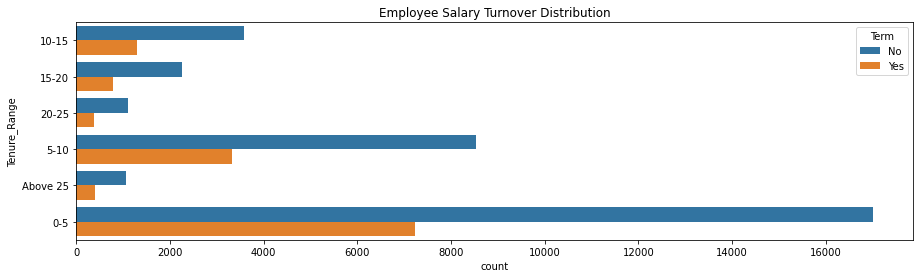

In [427]:
ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Tenure_Range", hue='Term', data=df1).set_title('Employee Tenure_Range Distribution');

##### Summary:

1. 0-5 Years of Tenure_Range associates leaves the organization very early, and most of it.
2. Around 7000 New freshly Associates Leaves the organzation very early.
3. 5-10 Years of Tenure_Ranged Assocates were also likely to leave the Organization.

##### Stop and Think:

1. Check whether Work Country may effect the reason of associates to leave the organization.


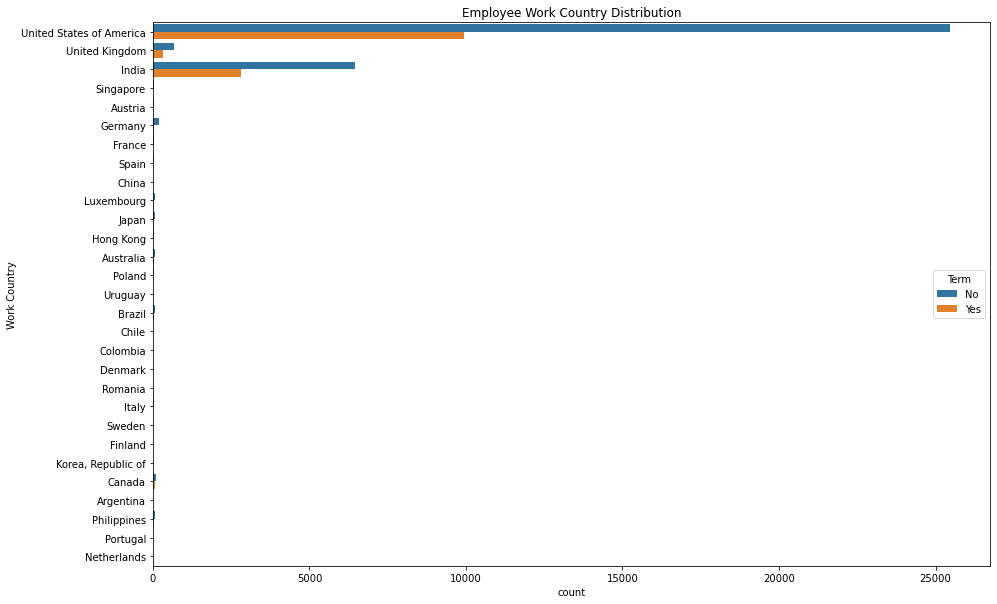

In [436]:
ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="Work Country", hue='Term', data=df1).set_title('Employee Work Country Distribution');

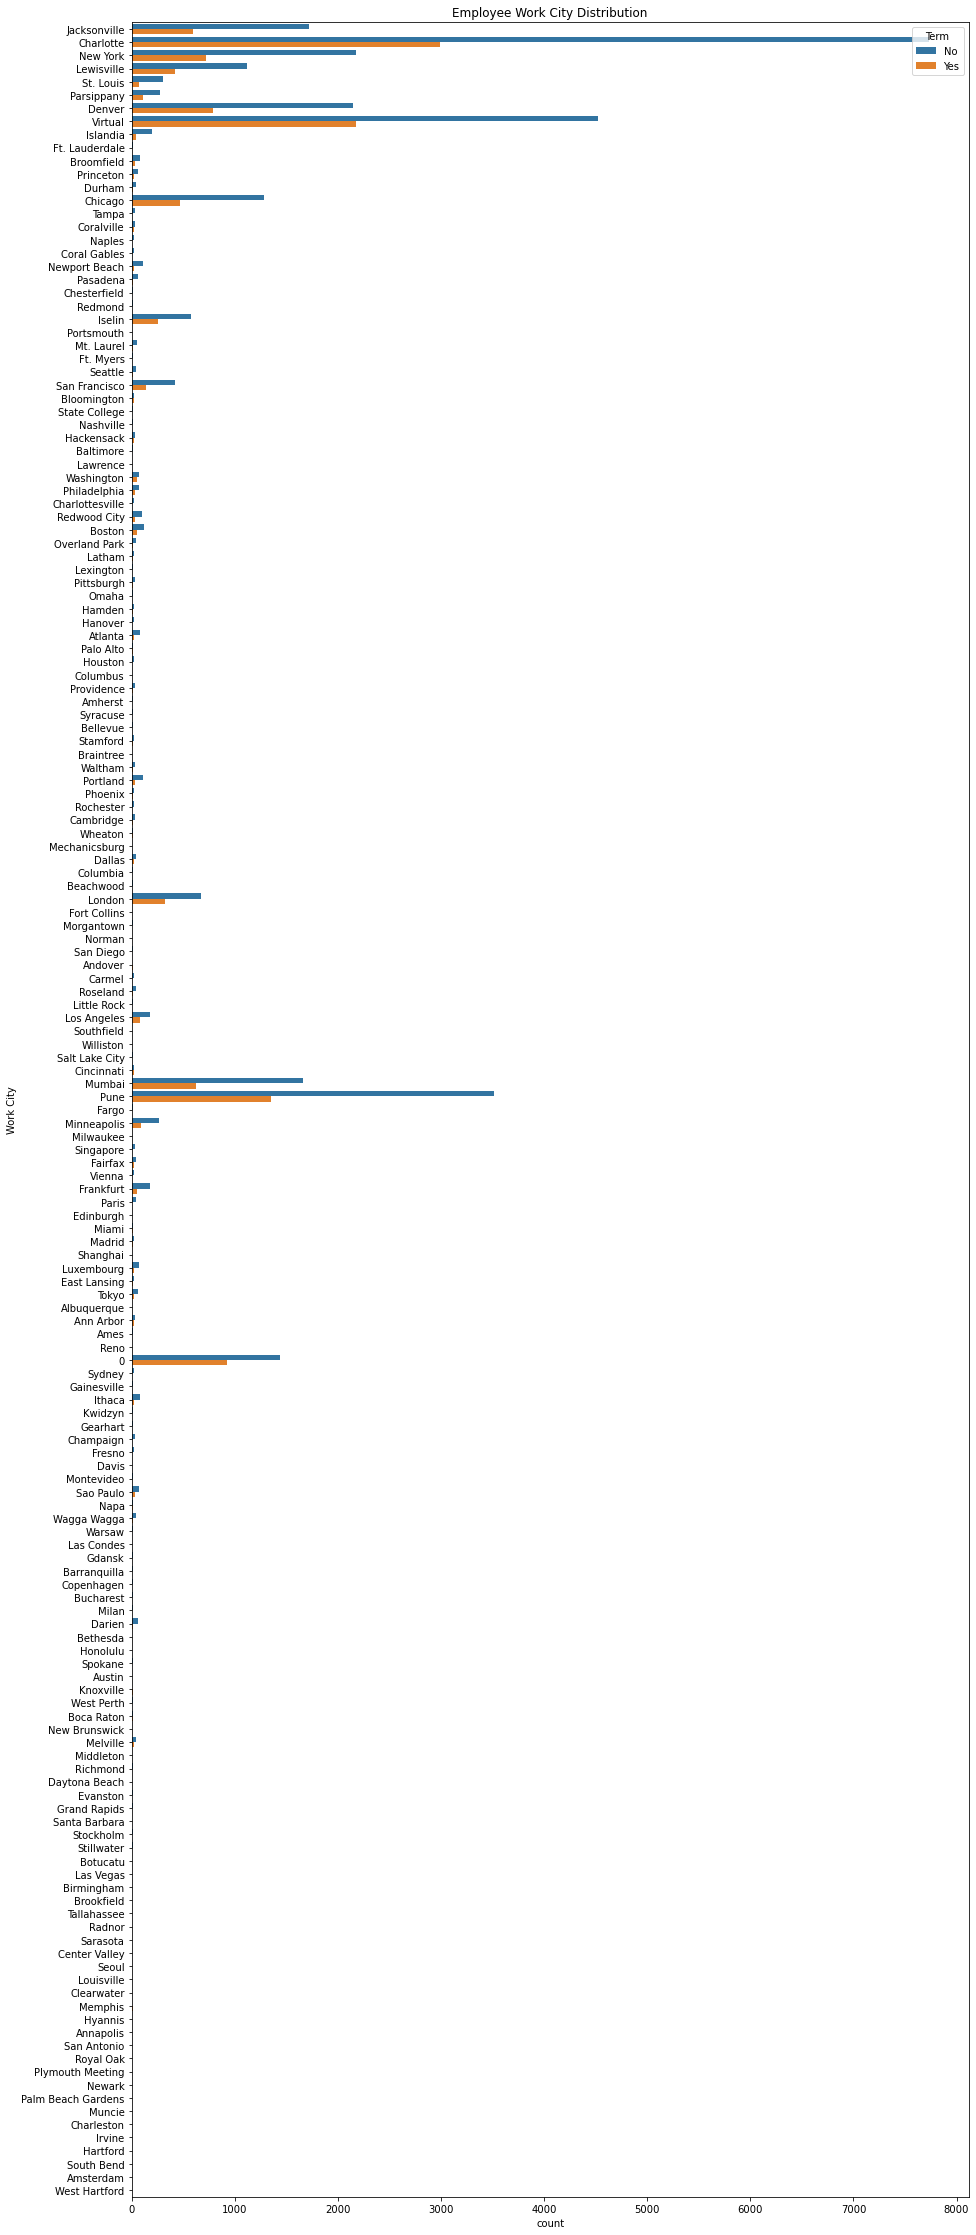

In [437]:
ax = plt.subplots(figsize=(15, 40))
sns.countplot(y="Work City", hue='Term', data=df1).set_title('Employee Work City Distribution');

##### Summary:

1. Mostly United States of America (City - Charlottes), and India (City - Pune) are the two most major Countries, cities which i s having mass increase of leaving the associates. 
2. This tells us Country and Cities were also be the major reasons to leave.
3. Maybe the place which they are wroking is fa from their homes, maybe they got another job opportunity nearby their home.

##### Stop and Think:
1. If we had more information on each Job Title, can we pinpoint a more direct cause for employee left?

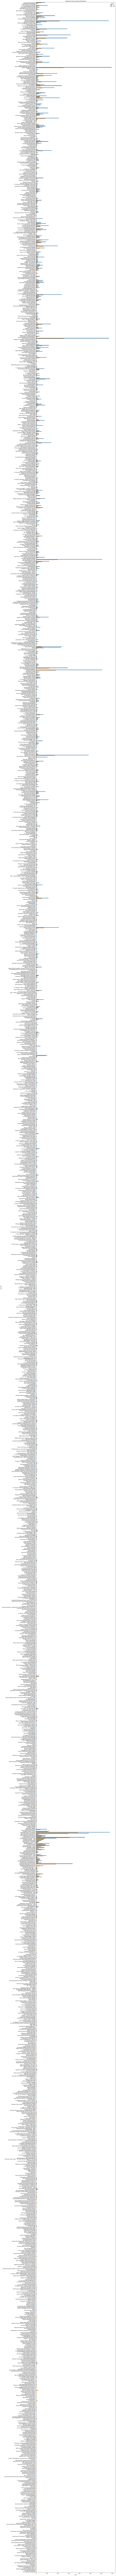

In [441]:
ax = plt.subplots(figsize=(15, 500))
sns.countplot(y="Job Title", hue='Term', data=df1).set_title('Employee Tenure_Range Distribution');

##### Summary:

1. Mostly CW Variable/Corporate are the two most major Job Titles which is having mass increase of leaving the associates. 
2. This tells us Job Title were also be the major reasons to leave.

##### Stop and Think:
1. If we had more information on each Individual Contributor / People Leader can we pinpoint a more direct cause for employee left?

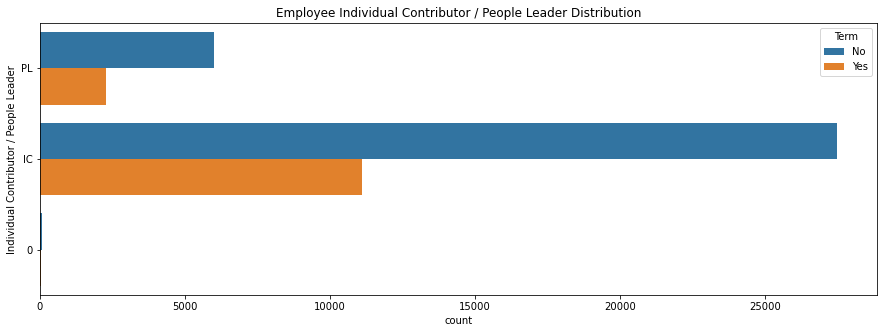

In [444]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Individual Contributor / People Leader", hue='Term', data=df1).set_title('Employee Individual Contributor / People Leader Distribution');

##### Summary:

1. That means Individual Contrbutor were the most Associates which leaves the company very fast.
2. The cause could be they were wroking too hard and not getting much pay.

##### Stop and Think:
1. If we had more information on Tenure Time and at what duration they are working in that domain then, can we pinpoint a more direct cause for employee left

Text(0.5, 1.0, 'Employee Tenure Duration - Turnover V.S. No Turnover')

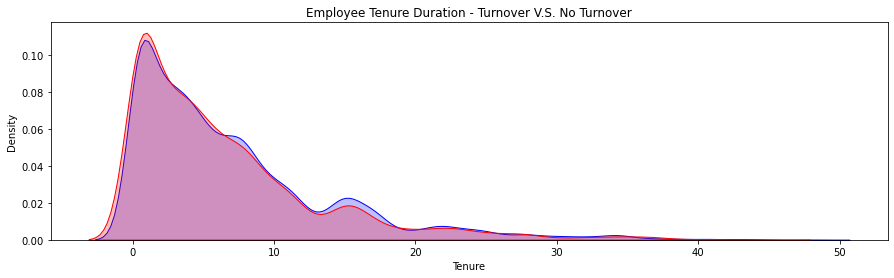

In [446]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Term'] == 0),'Tenure'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Term'] == 1),'Tenure'] , color='r',shade=True, label='turnover')
plt.title('Employee Tenure Duration - Turnover V.S. No Turnover')

##### Summary:

1. 0- 10 years Tenure people aremosre likely to leave the organization, as resultant in above plot 

##### Stop and Think:
1. If we had more information on Marital Status then, can we pinpoint a more direct cause for employee left

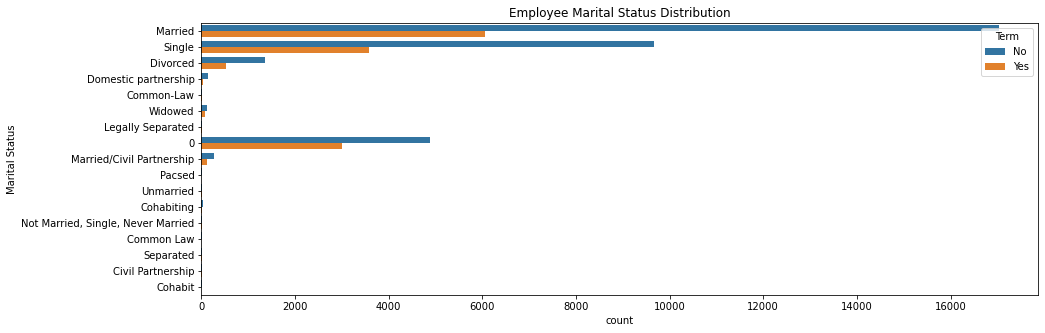

In [447]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Marital Status", hue='Term', data=df1).set_title('Employee Marital Status Distribution');

##### Summary:

1. Married are the most type of associates who were leaving the organization.
2. Maybe they have some family issues or any reason.
3. Single peoples were aslo likely to leave the organization 

##### Stop and Think:
1. If we had more information on TReporting Level/Manager then, can we pinpoint a more direct cause for employee left.
2. What type of work they re providing which leads to our result.

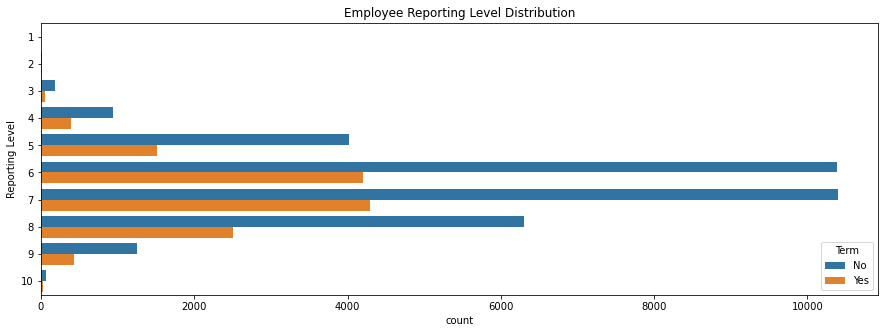

In [448]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Reporting Level", hue='Term', data=df1).set_title('Employee Reporting Level Distribution');

##### Summary:

1. Pease note that 6 and 7 reporting levels have may be the cause for most associated to leave the organzation.
2. Please check for the 6 and 7 reporting levels.

##### Stop and Think:
1. If we had more information on Assignment Category (or Full Time/Part Time) then, can we pinpoint a more direct cause for employee left

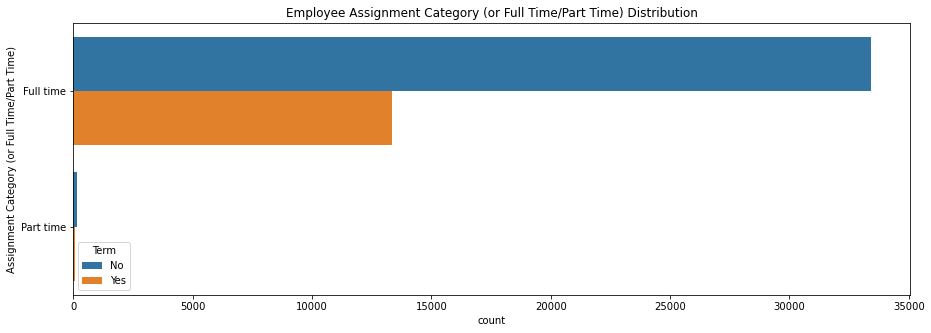

In [453]:
ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Assignment Category (or Full Time/Part Time)", hue='Term', data=df1).set_title('Employee Assignment Category (or Full Time/Part Time) Distribution');

##### Summary:

1.Full Time people will maily leave the organization as they are working too much.

##### Stop and Think:
1. If we had more information Age groups of people then, can we pinpoint a more direct cause for employee left

Term
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

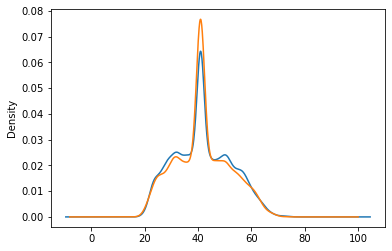

In [454]:
df1.groupby('Term').Age.plot(kind='kde')

Term
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

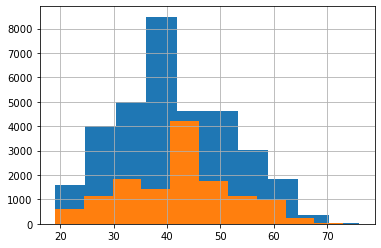

In [457]:
df1.groupby('Term').Age.hist()

##### Summary:

1. Mainly Age Group 40 -50 Years of aged people leaves the organization.
2. Through our data Generation X and Y would be the group which comes in 40 - 50 years of age group persons.

##### Stop and Think:
1. If we had more information on Current Rating then, can we pinpoint a more direct cause for employee left

Text(0.5, 1.0, 'Employee Current Rating Distribution - Turnover V.S. No Turnover')

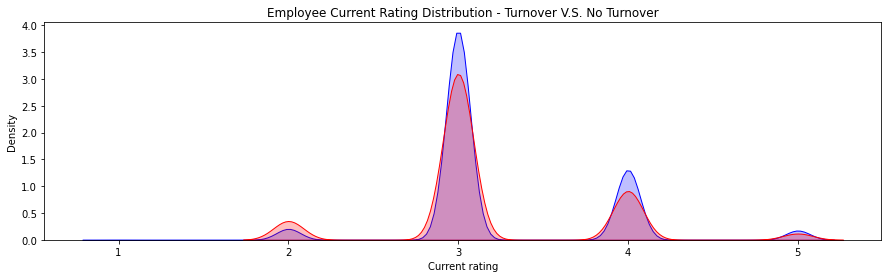

In [459]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df1.loc[(df['Term'] == 0),'Current rating'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df1.loc[(df['Term'] == 1),'Current rating'] , color='r',shade=True, label='turnover')
plt.title('Employee Current Rating Distribution - Turnover V.S. No Turnover')

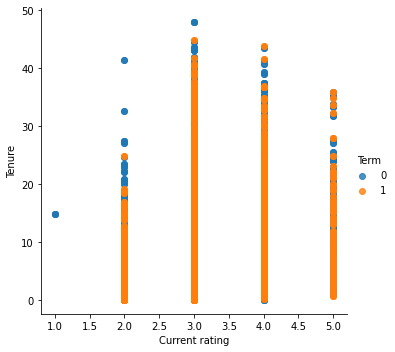

In [462]:
sns.lmplot(x='Current rating', y='Tenure', data=df,
           fit_reg=False, # No regression line
           hue='Term')   # Color by evolution stage

##### Summary:

1.This plot shows that while having Mediocre Current Rating( 3 and 4) and working too long, will lead to the associates leaving the organization.

#### 3. Prediciting the Turnover"


In [467]:
term_rate = df.Term.value_counts() / len(df)
term_rate

0    0.714468
1    0.285532
Name: Term, dtype: float64

#####  Looks like about 71% of employees stayed and 29% of employees left. 

In [468]:
# Overview of summary (Turnover V.S. Non-turnover)
term_Summary = df.groupby('Term')
term_Summary.mean()

Tenure_Range       Empl Id    Location  Location Code  Work Country  \
Term                                                                        
0         1.515703   9198.176371  126.145173     141.268087     23.842461   
1         1.436997  10427.700641  128.175887     143.213316     23.633686   

      Work City  Work State    Job Title  Business Title  \
Term                                                       
0     78.859118   23.271454  1288.683611     1952.204052   
1     78.750224   24.055547  1204.378840     1834.854086   

      Individual Contributor / People Leader  Job Family  Client Facing  \
Term                                                                      
0                                   1.176222  107.120739       1.798182   
1                                   1.167537  102.934611       1.807859   

        Tenure  Time in Role  Marital Status  Generation  Reporting Level  \
Term                                                                        
0     7.034855      1.743223        9.026609    3.224970         6.611353   
1     6.534085      1.796237        8.240233    3.124963         6.611915   

      Assignment Category (or Full Time/Part Time)        Age  Current rating  
Term                                                                           
0                                         0.004678  41.729768        3.258909  
1                                         0.004324  41.650239        3.177528

### EXL Assignment Tableau Dashboard

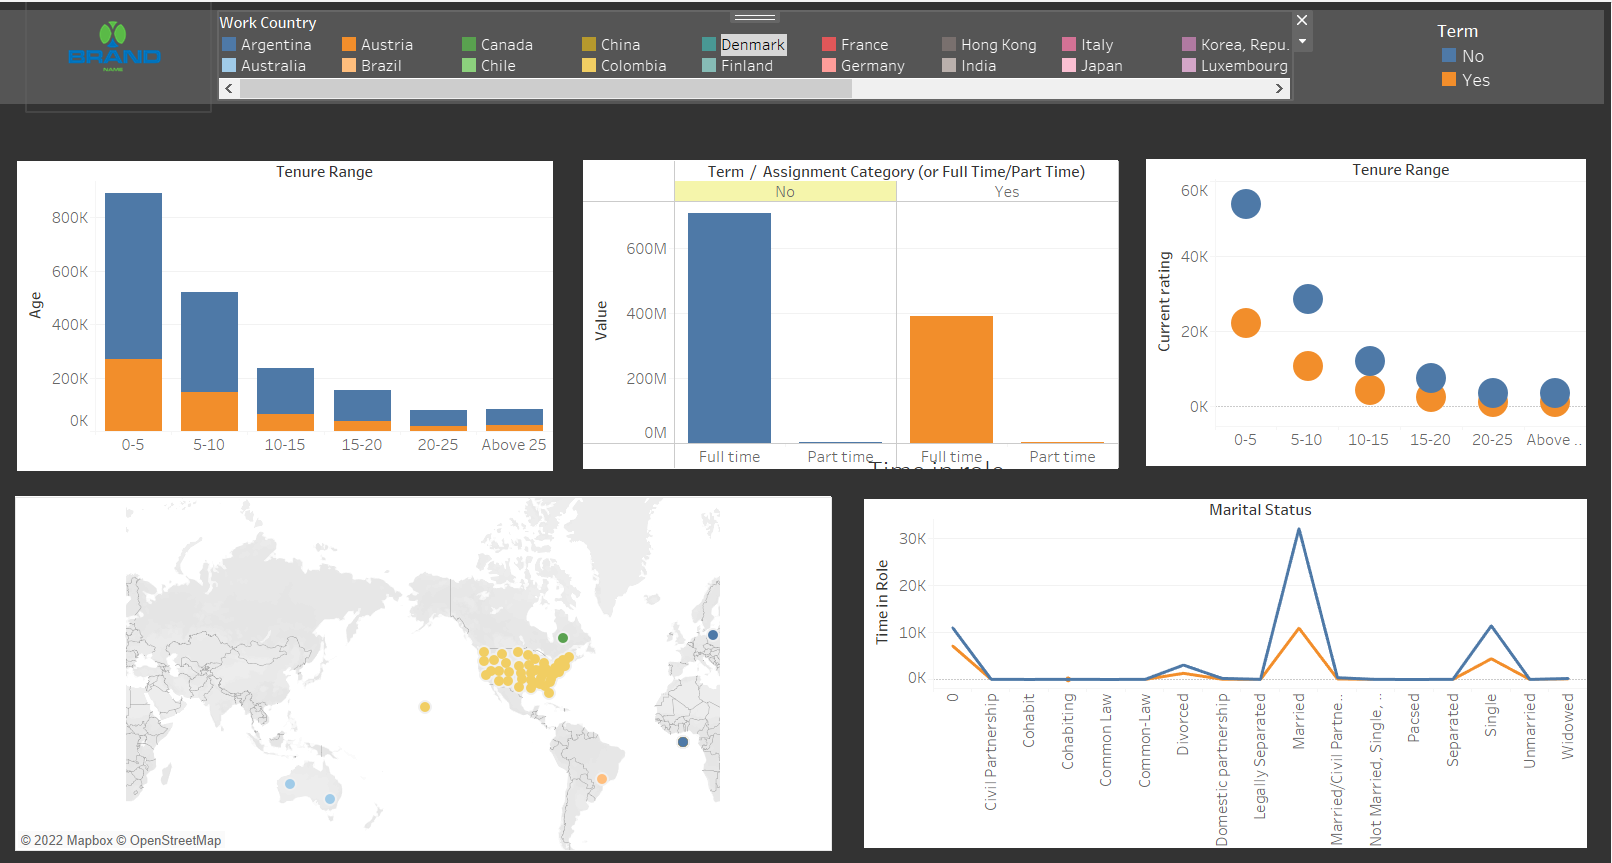

In [499]:
display.Image('D:\Downloads_D/dash1_EXL.png')